<a href="https://colab.research.google.com/github/PiretKaris/wotech-first/blob/main/Titanic_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Load the Titanic dataset into a Pandas DataFrame.

import pandas as pd

titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

In [87]:
# Use Pandas methods to explore and understand the dataset.
# Display the first few rows to get an overview of the data structure.

print(titanic_df.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [88]:
# Check the dimensions of the dataset (number of rows and columns).

rows, columns = titanic_df.shape
print(f'Number of rows is {rows}, Number of columns is {columns}')

Number of rows is 891, Number of columns is 12


In [89]:
# Identify missing values.

missing_values = titanic_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [94]:
# Decide on strategies for handling them.

# Already dropped Cabin column since most values are missing with titanic_df.drop(columns=['Cabin'], inplace=True)

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [20]:
# Compute basic statistics (e.g., mean, median, min, max) for numerical columns

numerical_columns = titanic_df.select_dtypes(include=['number'])
statistics = numerical_columns.describe()
print("Statistics for numerical columns:")
print(statistics)

Statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [32]:
# Analyze categorical variable SEX (value counts).

titanic_df['Sex'].value_counts(dropna=False).reset_index()

,Sex,count
0,male,577
1,female,314


In [31]:
# Analyze categorical variable AGE (value counts).

titanic_df['Age'].value_counts(dropna=False).reset_index()

,Age,count
0,NaN,177
1,24.00,30
2,22.00,27
3,18.00,26
4,28.00,25
...,...,...
84,36.50,1
85,55.50,1
86,0.92,1
87,23.50,1


In [70]:
# Choose one column of the dataset that interests you - survival and fare correlation.
# Use Matplotlib pyplot to create a meaningful visualization

import matplotlib.pyplot as plt


Correlation between 'Sex' and 'Survived': 0.5433513806577555


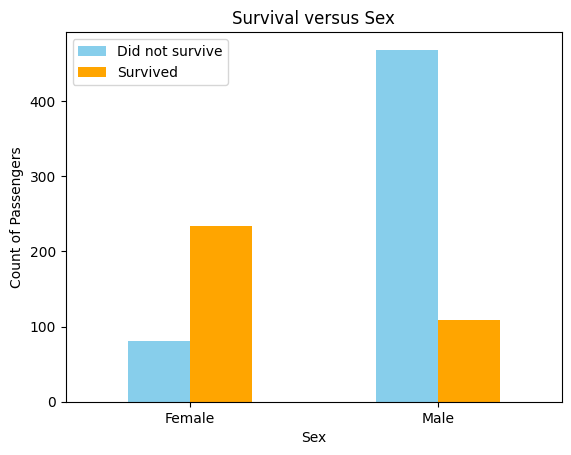

In [73]:
# Select an appropriate plot type (e.g., bar chart, histogram, pie chart)
survival_by_sex = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

survival_by_sex.plot(kind='bar', stacked=False, color=['skyblue', 'orange'])

# Label axes, add a title.
plt.title('Survival versus Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')

# Ensure the visualization is clear, informative, and visually appealing.
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['Did not survive', 'Survived'])

# Calculate and print the correlation between 'Sex' and 'Survived'
titanic_df['Sex_numeric'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
correlation = titanic_df['Survived'].corr(titanic_df['Sex_numeric'])
print(f"Correlation between 'Sex' and 'Survived': {correlation}")